In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import json
import pprint
import csv
import glob
import os

In [19]:
diab_hosp_pd = pd.read_csv('Resources/hospitalization.csv') #TRACT_FIPS
diab_hosp_pd = diab_hosp_pd.rename(columns={"TRACT_FIPS": "FIPS"})
diab_adults_pd = pd.read_csv('Resources/inadults.csv') #Census_Tract_FIPS
diab_adults_pd = diab_adults_pd.rename(columns={"Census_Tract_FIPS": "FIPS"})
diab_income_pd = pd.read_csv('Resources/income.csv') #FIPS
diab_food_pd = pd.read_csv('Resources/foodenviro.csv') #FIPS
diab_education_pd = pd.read_csv('Resources/education.csv') #FIPS


merged_diabetes_df = pd.merge(diab_hosp_pd, diab_adults_pd, on = "FIPS")
merged_diabetes_df = pd.merge(merged_diabetes_df, diab_income_pd, on = "FIPS")
merged_diabetes_df = pd.merge(merged_diabetes_df, diab_food_pd, on = "FIPS")
merged_diabetes_df = pd.merge(merged_diabetes_df, diab_education_pd, on = "FIPS")
merged_diabetes_df = merged_diabetes_df.dropna()
merged_diabetes_df.to_csv('Resources/merged.csv')
merged_diabetes_df = merged_diabetes_df.set_index('TRACT_NAME')
merged_diabetes_df.head()

,OBJECTID_x,FIPS,COUNTY_NAME,DIABETES_ADJRATE,DIABETES_L95CI,DIABETES_U95CI,DIABETES_STATEADJRATE,DIABETES_SL95CI,DIABETES_SU95CI,DIABETES_DISPLAY,...,Tract_Name_y,Tract_FIPS_y,County,Population_Total_y,Population_Density_PerLandSquareMile_y,Education_Population_AgeOver24,Percent_Education_Population_AgeOver24_LessThan9th,Percent_Education_Population_AgeOver24_NoHSDiploma,Percent_Education_Population_AgeOver24_HSD_Higher,Percent_Education_Population_AgeOver24_Bachelors_Higher
TRACT_NAME,,,,,,,,,,,,,,,,,,,,,
"Census Tract 9790, Fremont County, Colorado",1,8043979000,FREMONT,716.97,569.52,864.42,1267.78,1263.64,1271.91,Lower Than State Average,...,"Census Tract 9790, Fremont County, Colorado",8043979000,FREMONT,3471,3.4,2876,2.1,6.3,93.7,26.1
"Census Tract 9516, Garfield County, Colorado",2,8045951600,GARFIELD,602.99,495.07,710.91,1267.78,1263.64,1271.91,Lower Than State Average,...,"Census Tract 9516, Garfield County, Colorado",8045951600,GARFIELD,3656,6.4,2372,4.3,11.3,88.7,45.2
"Census Tract 28.03, Larimer County, Colorado",3,8069002803,LARIMER,0.00,0.00,0.00,1267.78,1263.64,1271.91,No Events or Data Suppressed,...,"Census Tract 28.03, Larimer County, Colorado",8069002803,LARIMER,97,0.4,45,0.0,0.0,100.0,51.1
"Census Tract 9632, Yuma County, Colorado",4,8125963200,YUMA,1390.98,1268.46,1513.50,1267.78,1263.64,1271.91,Not Different Than State Average,...,"Census Tract 9632, Yuma County, Colorado",8125963200,YUMA,5467,5.3,3878,9.7,15.9,84.0,22.2
"Census Tract 24.01, Larimer County, Colorado",5,8069002401,LARIMER,529.77,370.49,689.05,1267.78,1263.64,1271.91,Lower Than State Average,...,"Census Tract 24.01, Larimer County, Colorado",8069002401,LARIMER,1310,3.3,1179,0.8,5.0,95.1,46.3


LI = low income
LA = low access

Low-income and low-access tract measured at 1 mile and 10 miles
Definition: A low-income tract with at least 500 people, or 33 percent of the population, living more than 1 mile (urban areas) or more than 10 miles (rural areas) from the nearest supermarket, supercenter, or large grocery store.

Low-income and low-access tract measured at 1 and 20 miles
Definition: A low-income tract with at least 500 people, or 33 percent of the population, living more than 1 mile (urban areas) or more than 20 miles (rural areas) from the nearest supermarket, supercenter, or large grocery store.

Low-income and low-access tract using vehicle access and at 20 miles
Definition: A low-income tract in which at least one of the following is true: at least 100 households are located more than ½ mile from the nearest supermarket and have no vehicle access; or at least 500 people, or 33 percent of the population, live more than 20 miles from the nearest supermarket, regardless of vehicle availability.

In [29]:
narrowed_diab_df = merged_diabetes_df[['COUNTY_NAME', 'DIABETES_ADJRATE', 'DIABETES_STATEADJRATE',
                    'Adult_Population_Age18_and_over', 'Diabetes_Census_Tract_Estimate', 
                    'Population_Total_y', 'Population_Density_PerLandSquareMile_y',
                    'Percent_Poverty_AllPeople_Income_Below_Pov_Level', 'Poverty_Median_Household_Income', 
                    'Poverty_Mean_Household_Income', 'Poverty_Per_Capita_Income', 'LILATracts_1And10', 
                                       'LILATracts_halfAnd10', 'LILATracts_1And20', 
                                       'LILATracts_Vehicle', 'Urban', 'Rural', 'LowIncomeTracts', 'Percent_Education_Population_AgeOver24_LessThan9th',
                                      'Percent_Education_Population_AgeOver24_NoHSDiploma', 'Percent_Education_Population_AgeOver24_HSD_Higher',
                                      'Percent_Education_Population_AgeOver24_Bachelors_Higher']]

narrowed_diab_df = narrowed_diab_df.rename(columns={'COUNTY_NAME':'County', 'DIABETES_ADJRATE':'Hospitalization_Census_Tract_Rate_per_100,000',
                                                    'DIABETES_STATEADJRATE':'Hospitlization_State_Rate_per_100,000',
                                                    'Adult_Population_Age18_and_over':'Adult_Pop_Over_18', 
                                                    'Diabetes_Census_Tract_Estimate':'Census_Tract_Estimate', 
                                                    'Population_Total_y':'Pop_Total', 
                                                    'Population_Density_PerLandSquareMile':'Pop_Density/Sq_Mile',
                                                    'Percent_Poverty_AllPeople_Income_Below_Pov_Level': 'Percent_Poverty', 
                                                    'Poverty_Median_Household_Income': 'Median_Household_Income',
                                                    'Poverty_Per_Capita_Income': 'Per_Capita_Income', 
                                                    'Urban': 'Urban', 'Rural':'Rural', 'LowIncomeTracts': 'Low_Income_Tract'})

print(narrowed_diab_df.dtypes)
ct_total_count = narrowed_diab_df['County'].count()
print(ct_total_count)
narrowed_diab_df.head()

County                                                      object
Hospitalization_Census_Tract_Rate_per_100,000              float64
Hospitlization_State_Rate_per_100,000                      float64
Adult_Pop_Over_18                                            int64
Census_Tract_Estimate                                      float64
Pop_Total                                                    int64
Population_Density_PerLandSquareMile_y                     float64
Percent_Poverty                                            float64
Median_Household_Income                                    float64
Poverty_Mean_Household_Income                              float64
Per_Capita_Income                                            int64
LILATracts_1And10                                            int64
LILATracts_halfAnd10                                         int64
LILATracts_1And20                                            int64
LILATracts_Vehicle                                           i

,County,"Hospitalization_Census_Tract_Rate_per_100,000","Hospitlization_State_Rate_per_100,000",Adult_Pop_Over_18,Census_Tract_Estimate,Pop_Total,Population_Density_PerLandSquareMile_y,Percent_Poverty,Median_Household_Income,Poverty_Mean_Household_Income,...,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,Urban,Rural,Low_Income_Tract,Percent_Education_Population_AgeOver24_LessThan9th,Percent_Education_Population_AgeOver24_NoHSDiploma,Percent_Education_Population_AgeOver24_HSD_Higher,Percent_Education_Population_AgeOver24_Bachelors_Higher
TRACT_NAME,,,,,,,,,,,,,,,,,,,,,
"Census Tract 9790, Fremont County, Colorado",FREMONT,716.97,1267.78,2994,10.0,3471,3.4,9.7,49483.0,61677.0,...,1,0,0,0,1,1,2.1,6.3,93.7,26.1
"Census Tract 9516, Garfield County, Colorado",GARFIELD,602.99,1267.78,2800,5.0,3656,6.4,14.5,59154.0,82512.0,...,0,0,0,0,1,0,4.3,11.3,88.7,45.2
"Census Tract 28.03, Larimer County, Colorado",LARIMER,0.00,1267.78,97,1.6,97,0.4,38.1,43882.0,41385.0,...,0,0,0,0,1,0,0.0,0.0,100.0,51.1
"Census Tract 9632, Yuma County, Colorado",YUMA,1390.98,1267.78,4381,8.0,5467,5.3,13.4,44315.0,53229.0,...,1,0,0,0,1,1,9.7,15.9,84.0,22.2
"Census Tract 24.01, Larimer County, Colorado",LARIMER,529.77,1267.78,1190,8.0,1310,3.3,10.2,61111.0,83656.0,...,1,1,1,0,1,1,0.8,5.0,95.1,46.3


In [41]:
narrowed_diab_rural = narrowed_diab_df[narrowed_diab_df["Rural"]== 1]
ct_rural_count = narrowed_diab_rural["County"].count()
print(f"There are {ct_rural_count} Colorado census tracts designated as rural.")
ct_rural_sum = narrowed_diab_rural["Pop_Total"].sum()
print(f"There are {ct_rural_sum} people living in rural census tracts in Colorado.")
ct_rural_per_cap = narrowed_diab_rural["Per_Capita_Income"].mean()
print(f"The average per capita income is {ct_rural_per_cap} for these census tracts.")
avg_diab_rural = narrowed_diab_rural["Census_Tract_Estimate"].mean()
print(f"The average diabetes rate for rural census tracts is: {avg_diab_rural}.")
avg_hosp_rural = narrowed_diab_rural["Hospitalization_Census_Tract_Rate_per_100,000"].mean()
print(f"The average diabetes hospitalization rate per 100,000 for rural census tracts is: {avg_hosp_rural}.")
avg_per_rural = narrowed_diab_rural["Census_Tract_Estimate"].mean()
print(f"The estimated average diabetes diagnosis rate for adults in rural census tracts is: {avg_per_rural}.")
avg_median_rural = narrowed_diab_rural["Median_Household_Income"].mean()
print(f"The average median income in rural census tracts is: {avg_median_rural}.")
avg_edu9_rural = narrowed_diab_rural["Percent_Education_Population_AgeOver24_LessThan9th"].mean()
print(f"The avg percent of folks with less than a 9th grade education in rural census tracts: {avg_edu9_rural}.")
avg_eduhs_rural = narrowed_diab_rural["Percent_Education_Population_AgeOver24_NoHSDiploma"].mean()
print(f"The avg percent of folks with less than a HS education in rural census tracts: {avg_eduhs_rural}.")
avg_eduhsdhigh_rural = narrowed_diab_rural["Percent_Education_Population_AgeOver24_HSD_Higher"].mean()
print(f"The avg percent of folks with greater than a HS education in rural census tracts: {avg_eduhsdhigh_rural}.")
avg_edubshigh_rural = narrowed_diab_rural["Percent_Education_Population_AgeOver24_Bachelors_Higher"].mean()
print(f"The avg percent of folks with a BS or greater education in rural census tracts: {avg_edubshigh_rural}.")

There are 264 Colorado census tracts designated as rural.
There are 1036160 people living in rural census tracts in Colorado.
The average per capita income is 35750.73484848485 for these census tracts.
The average diabetes rate for rural census tracts is: 7.35568181818182.
The average diabetes hospitalization rate per 100,000 for rural census tracts is: 868.8167045454544.
The estimated average diabetes diagnosis rate for adults in rural census tracts is: 7.35568181818182.
The average median income in rural census tracts is: 71591.31439393939.
The avg percent of folks with less than a 9th grade education in rural census tracts: 2.8837121212121186.
The avg percent of folks with less than a HS education in rural census tracts: 7.467424242424242.
The avg percent of folks with greater than a HS education in rural census tracts: 92.53446969696974.
The avg percent of folks with a BS or greater education in rural census tracts: 35.5352272727273.


In [45]:
narrowed_diab_urban = narrowed_diab_df[merged_diabetes_df["Urban"]== 1]
ct_urban_count = narrowed_diab_urban["County"].count()
print(f"There are {ct_urban_count} Colorado census tracts designated as urban.")
ct_urban_sum = narrowed_diab_urban["Pop_Total"].sum()
print(f"There are {ct_urban_sum} people living in urban census tracts in Colorado.")
ct_urban_per_cap = narrowed_diab_urban ["Per_Capita_Income"].mean()
print(f"The average per capita income is {ct_urban_per_cap} for these census tracts.")
avg_diab_urban = narrowed_diab_urban["Census_Tract_Estimate"].mean()
print(f"The average diabetes rate for urban census tracts is: {avg_diab_urban}.")
avg_hosp_urban = narrowed_diab_urban["Hospitalization_Census_Tract_Rate_per_100,000"].mean()
print(f"The average diabetes hospitalization rate per 100,000 for urban census tracts is: {avg_hosp_urban}.")
avg_per_urban = narrowed_diab_urban["Census_Tract_Estimate"].mean()
print(f"The estimated average diabetes diagnosis rate for adults in urban census tracts is: {avg_per_urban}.")
avg_median_urban = narrowed_diab_urban["Median_Household_Income"].mean()
print(f"The average median income in rural census tracts is: {avg_median_urban}.")
avg_edu9_urban = narrowed_diab_urban["Percent_Education_Population_AgeOver24_LessThan9th"].mean()
print(f"The avg percent of folks with less than a 9th grade education in urban census tracts: {avg_edu9_urban}.")
avg_eduhs_urban = narrowed_diab_urban["Percent_Education_Population_AgeOver24_NoHSDiploma"].mean()
print(f"The avg percent of folks with less than a HS education in urban census tracts: {avg_eduhs_urban}.")
avg_eduhsdhigh_urban = narrowed_diab_urban["Percent_Education_Population_AgeOver24_HSD_Higher"].mean()
print(f"The avg percent of folks with greater than a HS education in urban census tracts: {avg_eduhsdhigh_urban}.")
avg_edubshigh_urban = narrowed_diab_urban["Percent_Education_Population_AgeOver24_Bachelors_Higher"].mean()
print(f"The avg percent of folks with a BS or greater education in urban census tracts: {avg_edubshigh_urban}.")

There are 964 Colorado census tracts designated as urban.
There are 4359645 people living in urban census tracts in Colorado.
The average per capita income is 34716.10580912863 for these census tracts.
The average diabetes rate for urban census tracts is: 6.926348547717847.
The average diabetes hospitalization rate per 100,000 for urban census tracts is: 1594.1792842323657.
The estimated average diabetes diagnosis rate for adults in urban census tracts is: 6.926348547717847.
The average median income in rural census tracts is: 69115.81846473028.
The avg percent of folks with less than a 9th grade education in urban census tracts: 4.0075726141078825.
The avg percent of folks with less than a HS education in urban census tracts: 9.569294605809125.
The avg percent of folks with greater than a HS education in urban census tracts: 90.43008298755188.
The avg percent of folks with a BS or greater education in urban census tracts: 39.33246887966806.


In [46]:
narrowed_diab_lowinc = narrowed_diab_df[narrowed_diab_df["Low_Income_Tract"]== 1]
ct_lowinc_count = narrowed_diab_lowinc["County"].count()
print(f"There are {ct_lowinc_count} Colorado census tracts designated as lowinc.")
ct_lowinc_sum = narrowed_diab_lowinc["Pop_Total"].sum()
print(f"There are {ct_lowinc_sum} people living in lowinc census tracts in Colorado.")
ct_lowinc_per_cap = narrowed_diab_lowinc["Per_Capita_Income"].mean()
print(f"The average per capita income is {ct_lowinc_per_cap} for these census tracts.")
avg_diab_lowinc = narrowed_diab_lowinc["Census_Tract_Estimate"].mean()
print(f"The average diabetes rate for lowinc census tracts is: {avg_diab_lowinc}.")
avg_hosp_lowinc = narrowed_diab_lowinc["Hospitalization_Census_Tract_Rate_per_100,000"].mean()
print(f"The average diabetes hospitalization rate per 100,000 for lowinc census tracts is: {avg_hosp_rural}.")
avg_per_lowinc = narrowed_diab_lowinc["Census_Tract_Estimate"].mean()
print(f"The estimated average diabetes diagnosis rate for adults in lowinc census tracts is: {avg_per_rural}.")
avg_median_lowinc = narrowed_diab_lowinc["Median_Household_Income"].mean()
print(f"The average median income in lowinc census tracts is: {avg_median_lowinc}.")
avg_edu9_lowinc = narrowed_diab_lowinc["Percent_Education_Population_AgeOver24_LessThan9th"].mean()
print(f"The avg percent of folks with less than a 9th grade education in lowinc census tracts: {avg_edu9_lowinc}.")
avg_eduhs_lowinc = narrowed_diab_lowinc["Percent_Education_Population_AgeOver24_NoHSDiploma"].mean()
print(f"The avg percent of folks with less than a HS education in lowinc census tracts: {avg_eduhs_lowinc}.")
avg_eduhsdhigh_lowinc = narrowed_diab_lowinc["Percent_Education_Population_AgeOver24_HSD_Higher"].mean()
print(f"The avg percent of folks with greater than a HS education in lowinc census tracts: {avg_eduhsdhigh_lowinc}.")
avg_edubshigh_lowinc = narrowed_diab_lowinc["Percent_Education_Population_AgeOver24_Bachelors_Higher"].mean()
print(f"The avg percent of folks with a BS or greater education in lowinc census tracts: {avg_edubshigh_lowinc}.")

There are 475 Colorado census tracts designated as lowinc.
There are 1956204 people living in lowinc census tracts in Colorado.
The average per capita income is 25106.11157894737 for these census tracts.
The average diabetes rate for lowinc census tracts is: 7.868421052631578.
The average diabetes hospitalization rate per 100,000 for lowinc census tracts is: 868.8167045454544.
The estimated average diabetes diagnosis rate for adults in lowinc census tracts is: 7.35568181818182.
The average median income in lowinc census tracts is: 46630.20210526316.
The avg percent of folks with less than a 9th grade education in lowinc census tracts: 6.848842105263151.
The avg percent of folks with less than a HS education in lowinc census tracts: 15.462315789473687.
The avg percent of folks with greater than a HS education in lowinc census tracts: 84.53642105263151.
The avg percent of folks with a BS or greater education in lowinc census tracts: 26.580210526315767.


In [47]:
narrowed_diab_highinc = narrowed_diab_df[narrowed_diab_df["Low_Income_Tract"]== 0]
ct_highinc_count = narrowed_diab_highinc["County"].count()
print(f"There are {ct_highinc_count} Colorado census tracts designated as highinc.")
ct_highinc_sum = narrowed_diab_highinc["Pop_Total"].sum()
print(f"There are {ct_highinc_sum} people living in highinc census tracts in Colorado.")
ct_highinc_per_cap = narrowed_diab_highinc["Per_Capita_Income"].mean()
print(f"The average per capita income is {ct_highinc_per_cap} for these census tracts.")
avg_diab_highinc = narrowed_diab_highinc["Census_Tract_Estimate"].mean()
print(f"The average diabetes rate for highinc census tracts is: {avg_diab_highinc}.")
avg_hosp_highinc = narrowed_diab_highinc["Hospitalization_Census_Tract_Rate_per_100,000"].mean()
print(f"The average diabetes hospitalization rate per 100,000 for highinc census tracts is: {avg_hosp_highinc}.")
avg_per_highinc = narrowed_diab_highinc["Census_Tract_Estimate"].mean()
print(f"The estimated average diabetes diagnosis rate for adults in highinc census tracts is: {avg_per_highinc}.")
avg_median_highinc = narrowed_diab_highinc["Median_Household_Income"].mean()
print(f"The average median income in highinc census tracts is: {avg_median_highinc}.")
avg_edu9_highinc = narrowed_diab_highinc["Percent_Education_Population_AgeOver24_LessThan9th"].mean()
print(f"The avg percent of folks with less than a 9th grade education in highinc census tracts: {avg_edu9_highinc}.")
avg_eduhs_highinc = narrowed_diab_highinc["Percent_Education_Population_AgeOver24_NoHSDiploma"].mean()
print(f"The avg percent of folks with less than a HS education in highinc census tracts: {avg_eduhs_highinc}.")
avg_eduhsdhigh_highinc = narrowed_diab_highinc["Percent_Education_Population_AgeOver24_HSD_Higher"].mean()
print(f"The avg percent of folks with greater than a HS education in highinc census tracts: {avg_eduhsdhigh_highinc}.")
avg_edubshigh_highinc = narrowed_diab_highinc["Percent_Education_Population_AgeOver24_Bachelors_Higher"].mean()
print(f"The avg percent of folks with a BS or greater education in highinc census tracts: {avg_edubshigh_highinc}.")

There are 753 Colorado census tracts designated as highinc.
There are 3439601 people living in highinc census tracts in Colorado.
The average per capita income is 41140.925630810096 for these census tracts.
The average diabetes rate for highinc census tracts is: 6.482602921646746.
The average diabetes hospitalization rate per 100,000 for highinc census tracts is: 1052.706932270917.
The estimated average diabetes diagnosis rate for adults in highinc census tracts is: 6.482602921646746.
The average median income in highinc census tracts is: 84167.87516600266.
The avg percent of folks with less than a 9th grade education in highinc census tracts: 1.8212483399734383.
The avg percent of folks with less than a HS education in highinc census tracts: 5.1150066401062455.
The avg percent of folks with greater than a HS education in highinc census tracts: 94.88565737051785.
The avg percent of folks with a BS or greater education in highinc census tracts: 46.04541832669319.


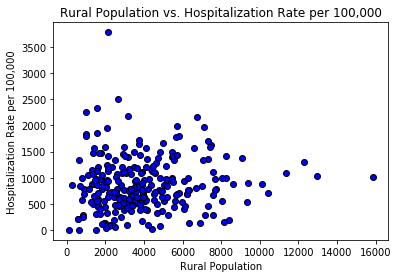

In [55]:
rural_pop = narrowed_diab_rural["Pop_Total"]
hosp_rate = narrowed_diab_rural["Hospitalization_Census_Tract_Rate_per_100,000"]
plt.scatter(rural_pop,hosp_rate, marker="o", facecolors="blue", edgecolors="black")
plt.title("Rural Population vs. Hospitalization Rate per 100,000")
plt.xlabel("Rural Population")
plt.ylabel("Hospitalization Rate per 100,000")
plt.show()

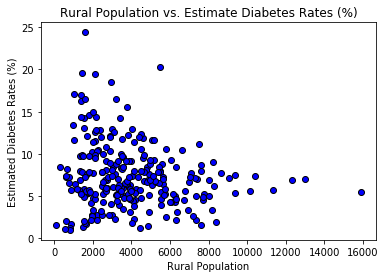

In [54]:
rural_pop = narrowed_diab_rural["Pop_Total"]
diab_rate = narrowed_diab_rural["Census_Tract_Estimate"]
plt.scatter(rural_pop,diab_rate, marker="o", facecolors="blue", edgecolors="black")
plt.title("Rural Population vs. Estimate Diabetes Rates (%)")
plt.xlabel("Rural Population")
plt.ylabel("Estimated Diabetes Rates (%)")
plt.show()

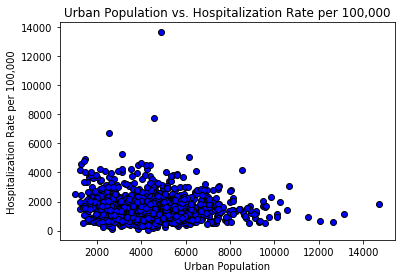

In [56]:
urban_pop = narrowed_diab_urban["Pop_Total"]
hosp_rate = narrowed_diab_urban["Hospitalization_Census_Tract_Rate_per_100,000"]
plt.scatter(urban_pop,hosp_rate, marker="o", facecolors="blue", edgecolors="black")
plt.title("Urban Population vs. Hospitalization Rate per 100,000")
plt.xlabel("Urban Population")
plt.ylabel("Hospitalization Rate per 100,000")
plt.show()

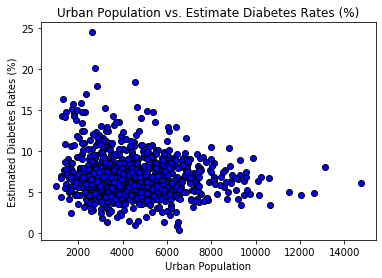

In [52]:
urban_pop = narrowed_diab_urban["Pop_Total"]
diab_rate = narrowed_diab_urban["Census_Tract_Estimate"]
plt.scatter(urban_pop,diab_rate, marker="o", facecolors="blue", edgecolors="black")
plt.title("Urban Population vs. Estimate Diabetes Rates (%)")
plt.xlabel("Urban Population")
plt.ylabel("Estimated Diabetes Rates (%)")
plt.show()

The correlation between both factors is 0.18


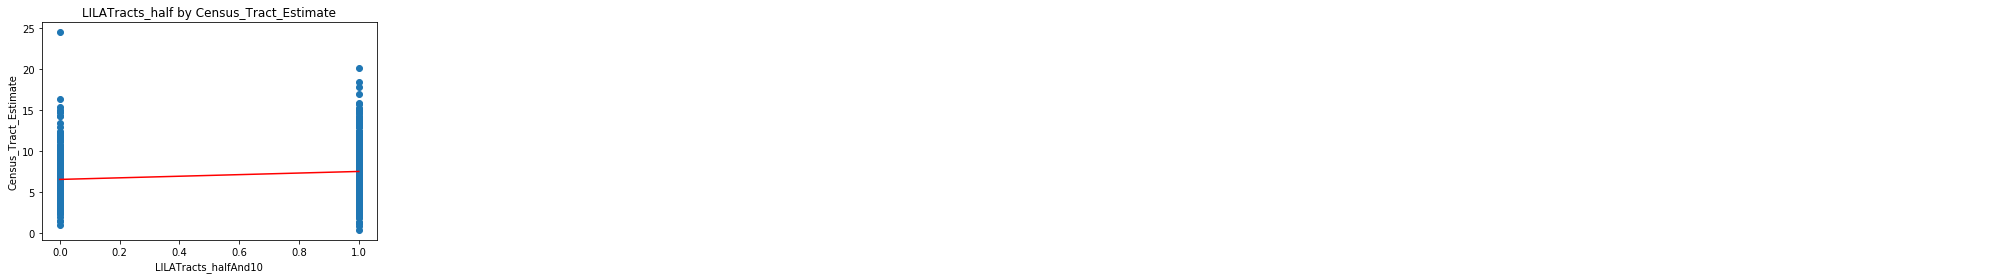

In [63]:
x_values = narrowed_diab_urban['LILATracts_halfAnd10']
y_values = narrowed_diab_urban['Census_Tract_Estimate']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('LILATracts_halfAnd10')
plt.ylabel('Census_Tract_Estimate')
plt.title('LILATracts_half by Census_Tract_Estimate')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.38


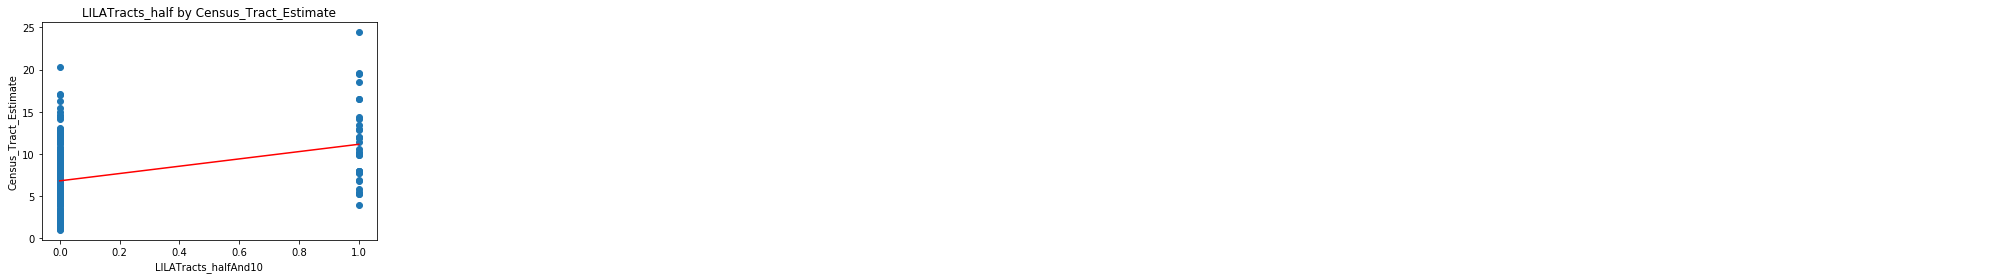

In [64]:
x_values = narrowed_diab_rural['LILATracts_halfAnd10']
y_values = narrowed_diab_rural['Census_Tract_Estimate']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('LILATracts_halfAnd10')
plt.ylabel('Census_Tract_Estimate')
plt.title('LILATracts_half by Census_Tract_Estimate')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.18


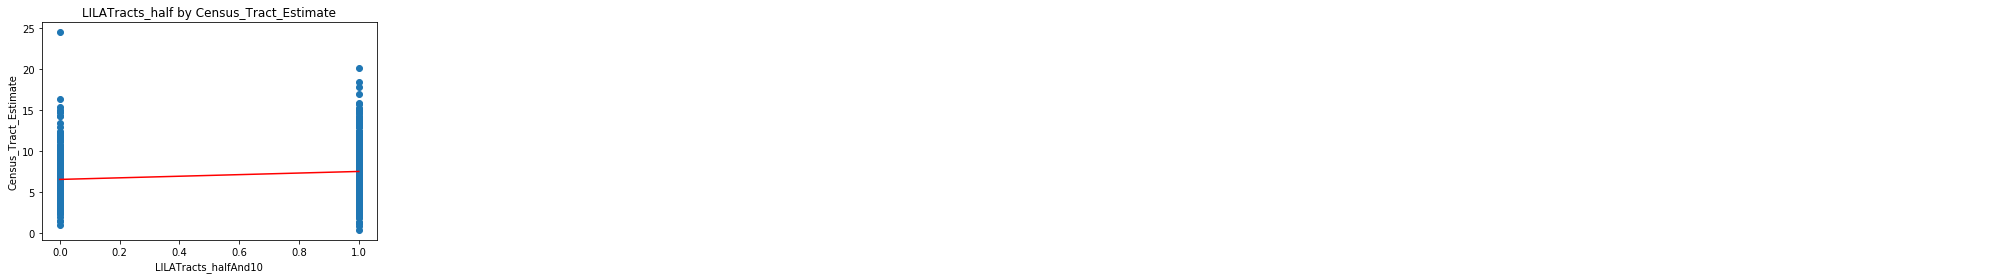

In [67]:
x_values = narrowed_diab_urban['LILATracts_halfAnd10']
y_values = narrowed_diab_urban['Census_Tract_Estimate']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('LILATracts_halfAnd10')
plt.ylabel('Census_Tract_Estimate')
plt.title('LILATracts_half by Census_Tract_Estimate')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.27


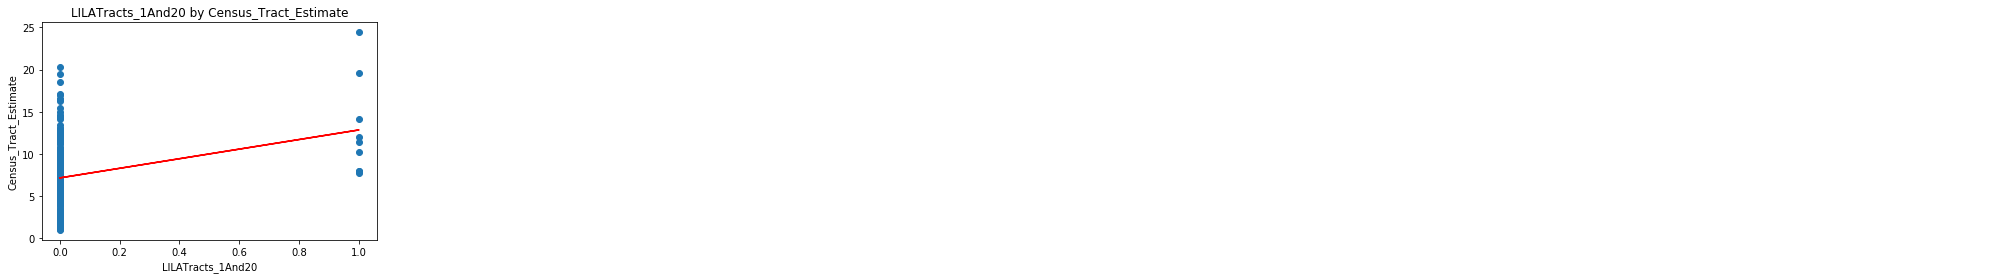

In [65]:
x_values = narrowed_diab_rural['LILATracts_1And20']
y_values = narrowed_diab_rural['Census_Tract_Estimate']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('LILATracts_1And20')
plt.ylabel('Census_Tract_Estimate')
plt.title('LILATracts_1And20 by Census_Tract_Estimate')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()



The correlation between both factors is 0.17


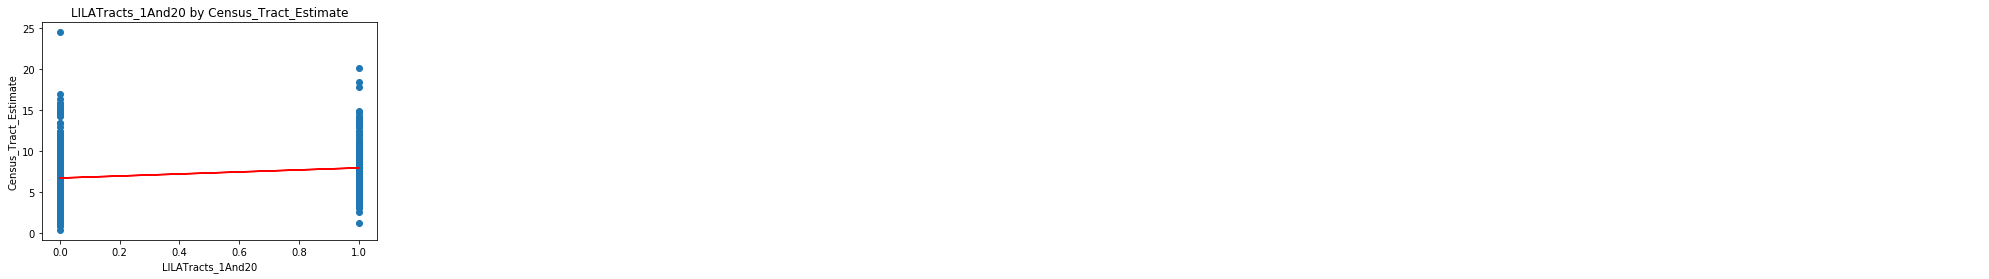

In [66]:
x_values = narrowed_diab_urban['LILATracts_1And20']
y_values = narrowed_diab_urban['Census_Tract_Estimate']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('LILATracts_1And20')
plt.ylabel('Census_Tract_Estimate')
plt.title('LILATracts_1And20 by Census_Tract_Estimate')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.38


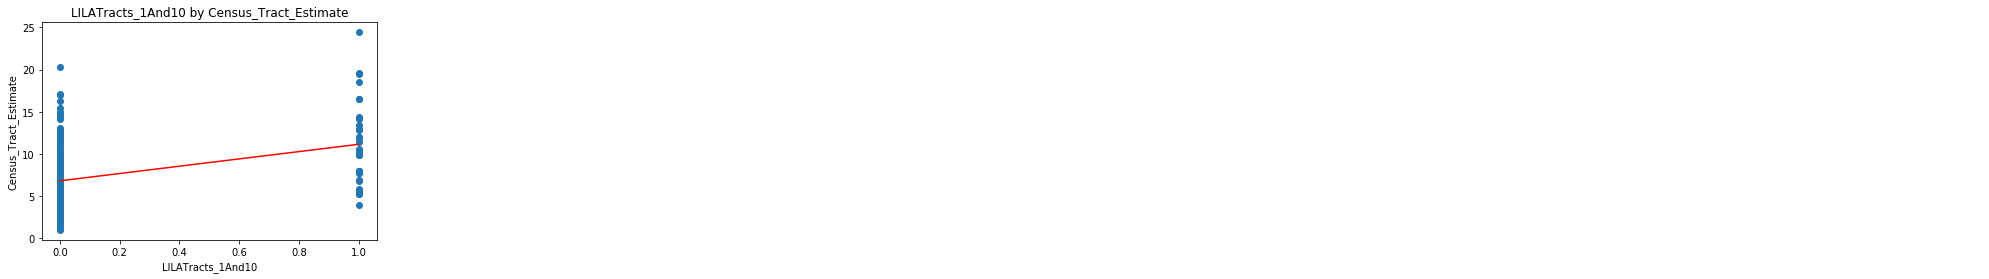

In [68]:
x_values = narrowed_diab_rural['LILATracts_1And10']
y_values = narrowed_diab_rural['Census_Tract_Estimate']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('LILATracts_1And10')
plt.ylabel('Census_Tract_Estimate')
plt.title('LILATracts_1And10 by Census_Tract_Estimate')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()


The correlation between both factors is 0.17


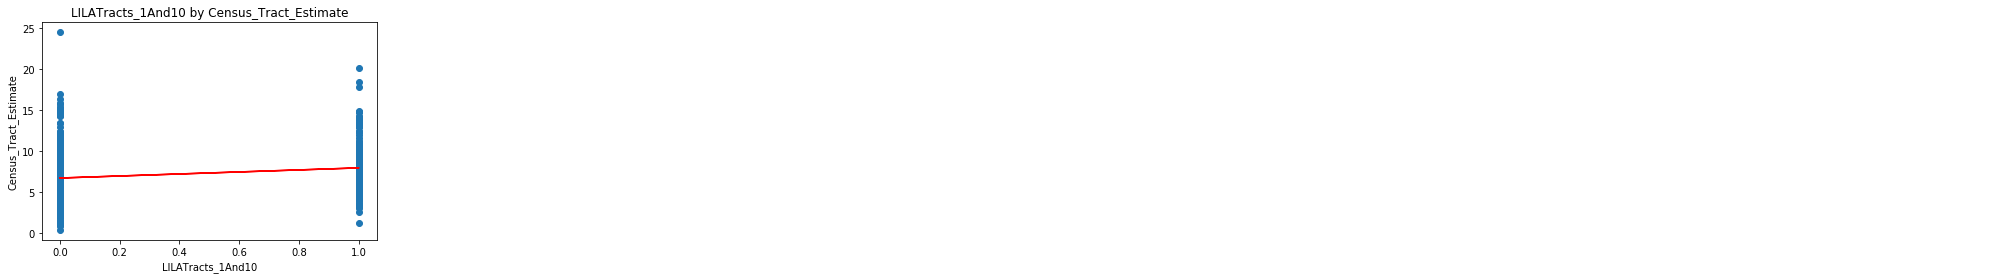

In [69]:
x_values = narrowed_diab_urban['LILATracts_1And10']
y_values = narrowed_diab_urban['Census_Tract_Estimate']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('LILATracts_1And10')
plt.ylabel('Census_Tract_Estimate')
plt.title('LILATracts_1And10 by Census_Tract_Estimate')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.17


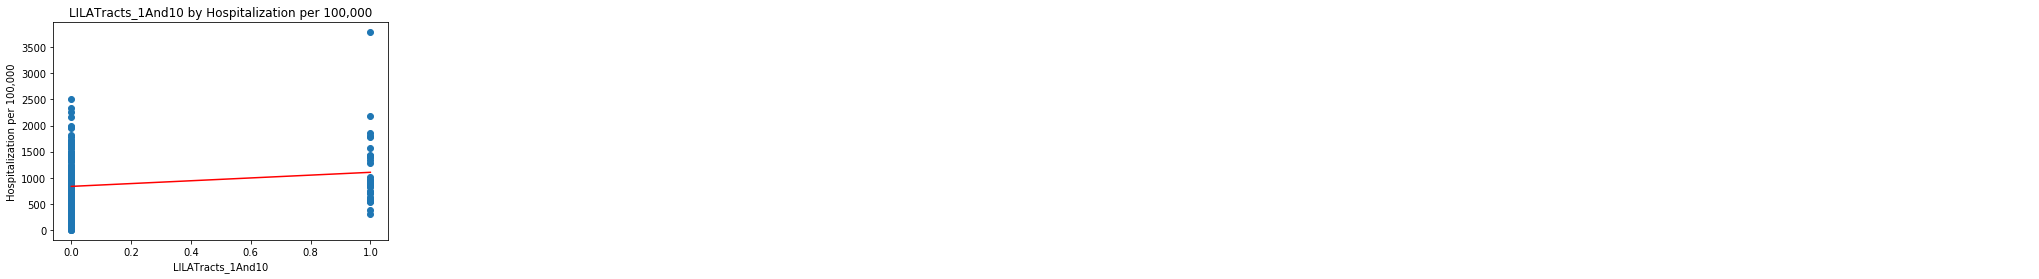

In [72]:
x_values = narrowed_diab_rural['LILATracts_1And10']
y_values = narrowed_diab_rural['']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('LILATracts_1And10')
plt.ylabel('Hospitalization per 100,000')
plt.title('LILATracts_1And10 by Hospitalization per 100,000')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.26


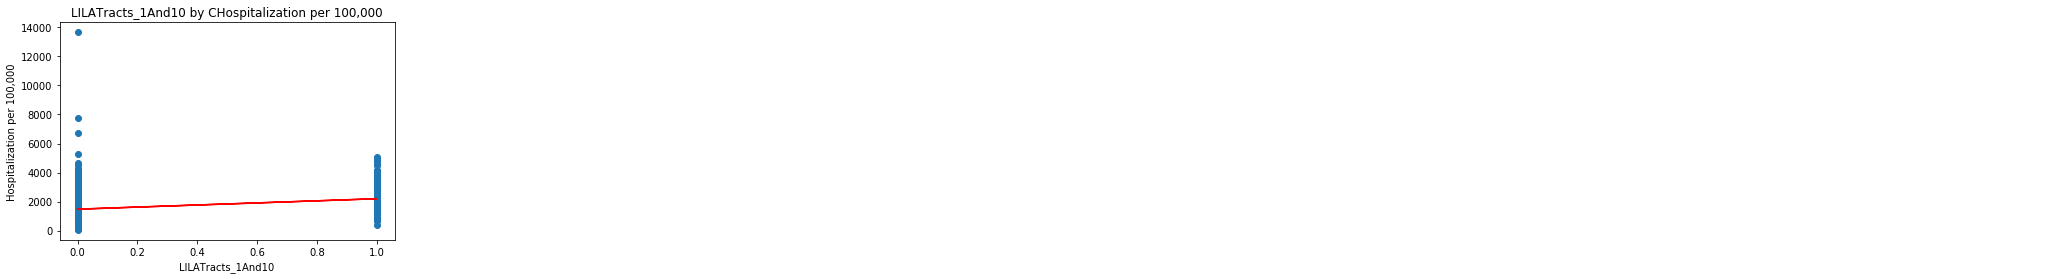

In [73]:
x_values = narrowed_diab_urban['LILATracts_1And10']
y_values = narrowed_diab_urban['Hospitalization_Census_Tract_Rate_per_100,000']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('LILATracts_1And10')
plt.ylabel('Hospitalization per 100,000')
plt.title('LILATracts_1And10 by CHospitalization per 100,000')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()